In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_train = pd.read_csv("dataset\\train.csv")
data_test = pd.read_csv("dataset\\test.csv")
data = pd.concat([data_train, data_test],axis=0,sort=True)
data = data.drop(columns=['Unnamed: 0'])

In [3]:
print("Initial data shape: ", data.shape)

Initial data shape:  (299285, 42)


### Removing Duplicate Rows


In [4]:
data.drop_duplicates(inplace=True)
print("Data shape after removing duplicates: ", data.shape) 

Data shape after removing duplicates:  (292550, 42)


### Outlier Detection

In [5]:
def create_box_plot(data):
    # plt.figure(figsize=(20, 8))
    # Create subplots with box plot in each
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    # ages = data['ages']
    # Extract those rows with wages per hour >0
    wage_per_hour= data[data['wage per hour'] > 0]
    capital_gains = data[data['capital gains'] > 0]
    capital_losses = data[data['capital losses'] > 0]
    dividends_from_stocks = data[data['dividends from stocks'] > 0]
    sns.boxplot(data=data[['age']], ax=ax[0, 0])
    sns.boxplot(data=wage_per_hour[['wage per hour']], ax=ax[0, 1])
    sns.boxplot(data=capital_gains[['capital gains']], ax=ax[0, 2])
    sns.boxplot(data=capital_losses[['capital losses']], ax=ax[1, 0])
    sns.boxplot(data=dividends_from_stocks[['dividends from stocks']], ax=ax[1, 1])
    sns.boxplot(data=data[['num persons worked for employer']], ax=ax[1, 2])
    plt.show()
    

From the box plots we observe that we can remove the
- wage per hour>8,000
- capital gains>80,000
- capital losses>4,000 and 
- dividends from stocks with value >80,000

In [6]:
def compute_stats(data):
    print("Means : ")
    print("Mean Age   = ",np.mean(data['age']))
    print("Mean Wage per Hour = ",np.mean(data['wage per hour']))
    print("Mean Capital Gains = ",np.mean(data['capital gains']))   
    print("Mean Captial Losses = ",np.mean(data['capital losses']))
    print("Mean Divideneds from stocks = ",np.mean(data['dividends from stocks']))
    print("Mean number of persons worked for employer = ",np.mean(data['num persons worked for employer']))

    print("\nMedians : ")   
    print("Median Age   = ",np.median(data['age']))
    print("Median Wage per Hour = ",np.median(data['wage per hour']))
    print("Median Capital Gains = ",np.median(data['capital gains']))   
    print("Median Captial Losses = ",np.median(data['capital losses']))
    print("Median Divideneds from stocks = ",np.median(data['dividends from stocks']))
    print("Median number of persons worked for employer = ",np.median(data['num persons worked for employer']))


    print("\n Standard deviations : ")  
    print("Std of Age   = ",np.std(data['age']))
    print("Std of Wage per Hour = ",np.std(data['wage per hour']))
    print("Std of Capital Gains = ",np.std(data['capital gains']))   
    print("Std of Captial Losses = ",np.std(data['capital losses']))
    print("Std of Divideneds from stocks = ",np.std(data['dividends from stocks']))
    print("Std of number of persons worked for employer = ",np.std(data['num persons worked for employer']))

    

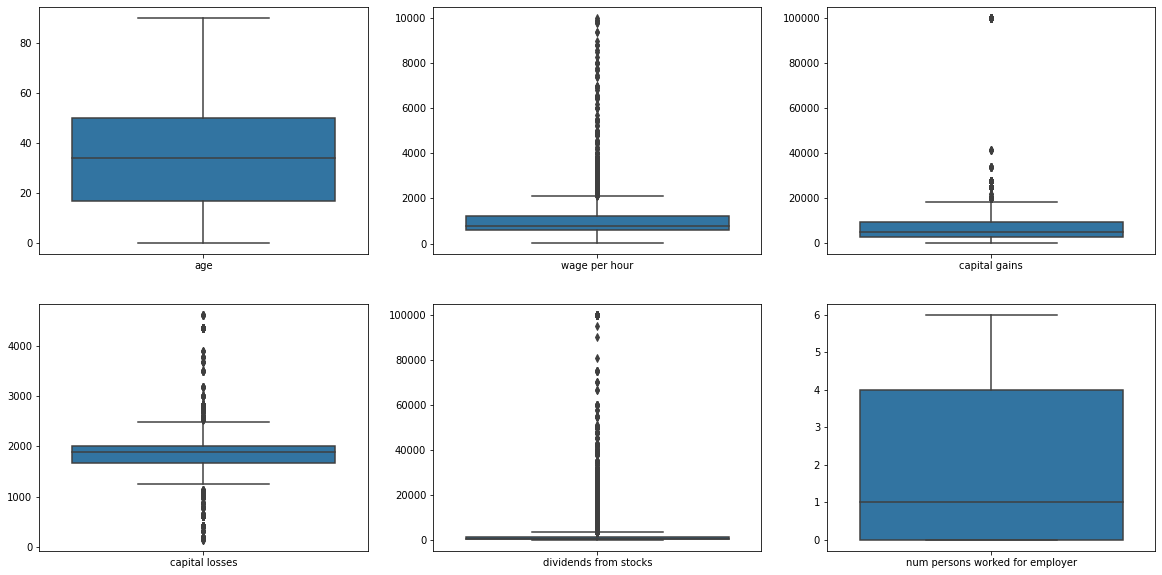

In [7]:
create_box_plot(data)

In [8]:
compute_stats(data)

Means : 
Mean Age   =  35.14873696803965
Mean Wage per Hour =  56.369147154332595
Mean Capital Gains =  441.68161681763803
Mean Captial Losses =  37.69733720731499
Mean Divideneds from stocks =  200.32219791488635
Mean number of persons worked for employer =  2.0008477183387456

Medians : 
Median Age   =  34.0
Median Wage per Hour =  0.0
Median Capital Gains =  0.0
Median Captial Losses =  0.0
Median Divideneds from stocks =  0.0
Median number of persons worked for employer =  1.0

 Standard deviations : 
Std of Age   =  22.174936234095224
Std of Wage per Hour =  276.33429037179513
Std of Capital Gains =  4723.754589057041
Std of Captial Losses =  272.8185510581883
Std of Divideneds from stocks =  1959.7084140838117
Std of number of persons worked for employer =  2.3729661494616168


In [9]:
data = data[data['wage per hour']<5000]
data = data[data['capital gains']<15000]
data = data[data['capital losses']<3500]
data = data[data['dividends from stocks']<2500]

In [10]:
compute_stats(data)

Means : 
Mean Age   =  34.638590098454856
Mean Wage per Hour =  55.26861357345573
Mean Capital Gains =  145.10325847027084
Mean Captial Losses =  35.195837567008866
Mean Divideneds from stocks =  40.49672050734032
Mean number of persons worked for employer =  1.989429242142882

Medians : 
Median Age   =  33.0
Median Wage per Hour =  0.0
Median Capital Gains =  0.0
Median Captial Losses =  0.0
Median Divideneds from stocks =  0.0
Median number of persons worked for employer =  1.0

 Standard deviations : 
Std of Age   =  22.07309910513625
Std of Wage per Hour =  255.11049277763107
Std of Capital Gains =  977.043198816562
Std of Captial Losses =  258.4130559665546
Std of Divideneds from stocks =  211.37470233925032
Std of number of persons worked for employer =  2.370075158300901


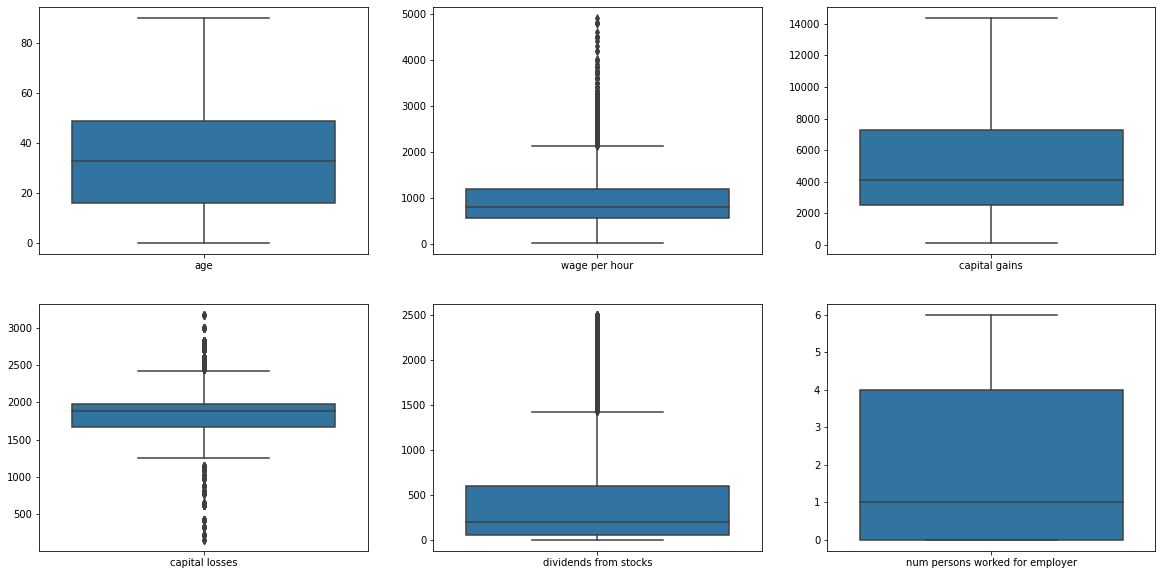

In [11]:
create_box_plot(data)

In [12]:
print(data.shape)

(285410, 42)


Observation either loss or gain not both

In [24]:
def plot_histogram(data):
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    ax[0,0].hist(data['age'], edgecolor='black',bins=20)
    ax[0,1].hist(data['wage per hour'],edgecolor='black', bins=20)
    ax[0,2].hist(data['capital gains'], edgecolor='black',bins=20)
    ax[1,0].hist(data['capital losses'],edgecolor='black', bins=20)
    ax[1,1].hist(data['dividends from stocks'], edgecolor='black',bins=20)
    ax[1,2].hist(data['num persons worked for employer'], edgecolor='black',bins=20)

    # sns.distplot(data['age'], ax=ax[0, 0])
    # sns.distplot(data['wage per hour'], ax=ax[0, 1])
    # sns.distplot(data['capital gains'], ax=ax[0, 2])
    # sns.distplot(data['capital losses'], ax=ax[1, 0])
    # sns.distplot(data['dividends from stocks'], ax=ax[1, 1])
    # sns.distplot(data['num persons worked for employer'], ax=ax[1, 2])
    plt.show()

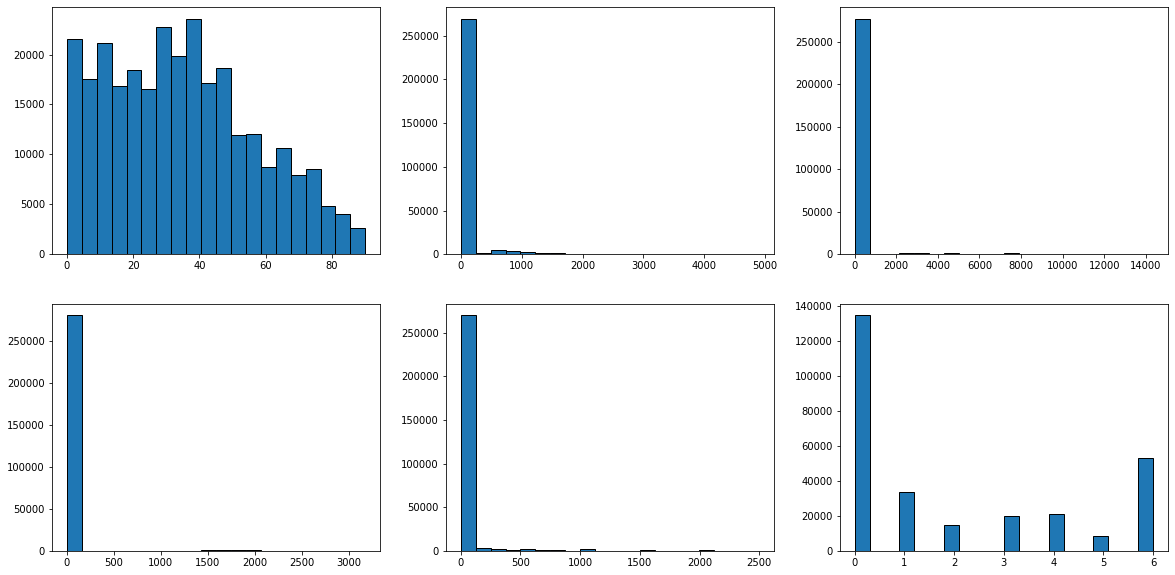

In [25]:
plot_histogram(data)